# **💡 Optimize the Power Consumption of Zone 1 Based on Various Environmental and Meteorological Factors in Wellington, New Zealand**

# **📝 Problem Statement**

Wellington, New Zealand faces fluctuations in power demand due to environmental and meteorological changes. To ensure sustainable energy consumption and efficient resource planning, we aim to build a predictive model that estimates **Zone 1 Power Consumption** based on factors like temperature, humidity, wind speed, cloudiness, air quality, and solar radiation flows.


# **🎯 Objective**

To develop a **Machine Learning model** that:
- 🔍 Predicts **Zone 1 Power Consumption**
- Uses environmental features like:  
   🌡️ Temperature  
   💧 Humidity  
   🌬️ Wind Speed  
   ☀️ General Diffuse Flows  
   🌥️ Diffuse Flows  
   🏭 Air Quality Index (PM)  
   ☁️ Cloudiness  
- ⚡ Helps in optimizing energy usage, reducing cost, and ensuring sustainability.


# **📁 Dataset Description**

| Column                         | Description                                                                                          |
|--------------------------------|------------------------------------------------------------------------------------------------------|
| 🔢 `Sr no.`                    | Serial Number                                                                                        |
| 🌡️ `Temperature`               | The temperature in Celsius at the specific location.                                                 |
| 💧 `Humidity`                  | The relative humidity percentage at the location (g/m³ – grams of water vapor per cubic meter).     |
| 🌬️ `Wind Speed`                | The speed of the wind at the location (nautical miles per hour).                                     |
| ☀️ `General Diffuse Flows`     | Refers to the amount/intensity of diffuse solar radiation in a specific area (m²/s).                 |
| 🌥️ `Diffuse Flows`             | The measure of diffuse solar radiation (m²/s).                                                       |
| 🏭 `Air Quality Index (PM)`    | An index representing air quality in the area (particles in micrograms per cubic meter).             |
| ☁️ `Cloudiness`                | The level of cloud cover at the location (1 = Yes, 0 = No).                                          |
| ⚡ `Power Consumption in A Zone` | The power consumption in Zone 1 (target variable) measured in kilowatt rating (KWR).                |


# **1️⃣ Import Necessary libraries**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# **2️⃣ Data Loading and Preview**

In [11]:
df = pd.read_excel('City Power Consumption.xlsx')

In [12]:
df.head()

S no Temperature Humidity  Wind Speed  general diffuse flows  \
0     1       6.559     73.8       0.083                  0.051   
1     2       6.414     74.5       0.083                  0.070   
2     3       6.313     74.5       0.080                  0.062   
3     4       6.121       75       0.083                  0.091   
4     5       5.921     75.7       0.081                  0.048   

   diffuse flows  Air Quality Index (PM)  Cloudiness  \
0          0.119                   158.0           1   
1          0.085                   159.0           1   
2          0.100                   151.0           1   
3          0.096                   151.0           1   
4          0.085                   154.0           1   

    Power Consumption in A Zone  
0                   34055.69620  
1                   29814.68354  
2                   29128.10127  
3                   28228.86076  
4                   27335.69620

In [13]:
df.tail()

S no Temperature Humidity  Wind Speed  general diffuse flows  \
52578  52579         NaN     75.6       0.094                  436.2   
52579  52580         NaN     73.5       0.089                  451.6   
52580  52581         NaN     70.1       0.085                  466.4   
52581  52582         NaN    67.75       0.086                  477.0   
52582  52583         NaN    66.24       0.088                  485.7   

       diffuse flows  Air Quality Index (PM)  Cloudiness  \
52578          38.96                   157.0           0   
52579          37.73                   157.0           0   
52580          37.49                   157.0           0   
52581          37.37                   152.0           0   
52582          36.72                   155.0           0   

        Power Consumption in A Zone  
52578                   34444.55696  
52579                   34438.48101  
52580                   33873.41772  
52581                   33988.86076  
52582                   34158.98734

# **3️⃣ Data Overview & Cleaning**

In [15]:
df.shape

(52583, 9)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 3.6+ MB


In [17]:
# Convert object to float
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['Humidity'] = pd.to_numeric(df['Humidity'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52260 non-null  float64
 2   Humidity                      52557 non-null  float64
 3   Wind Speed                    52512 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 3.6 MB


In [18]:
df.columns

Index(['S no', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)',
       'Cloudiness', ' Power Consumption in A Zone'],
      dtype='object')

In [19]:
# Rename Columns for Consistency
df.rename(columns=lambda x: x.strip().replace(" ", "_").replace("(", "").replace(")", ""), inplace=True)
df.columns

Index(['S_no', 'Temperature', 'Humidity', 'Wind_Speed',
       'general_diffuse_flows', 'diffuse_flows', 'Air_Quality_Index_PM',
       'Cloudiness', 'Power_Consumption_in_A_Zone'],
      dtype='object')

In [20]:
# Drop Unnecessary column
df.drop('S_no', axis=1, inplace=True)

In [21]:
# Check for missing values
print('*********** Missing values **********')
print(df.isnull().sum())

*********** Missing values **********
Temperature                    323
Humidity                        26
Wind_Speed                      71
general_diffuse_flows          308
diffuse_flows                   15
Air_Quality_Index_PM            18
Cloudiness                       0
Power_Consumption_in_A_Zone      0
dtype: int64


In [22]:
# Median imputation for continuous features
for col in ['Temperature', 'Humidity', 'Wind_Speed', 
            'general_diffuse_flows', 'diffuse_flows', 'Air_Quality_Index_PM']:
    df[col] = df[col].fillna(df[col].median())

In [23]:
# Check for missing values
print('*********** Missing values **********')
print(df.isnull().sum())

*********** Missing values **********
Temperature                    0
Humidity                       0
Wind_Speed                     0
general_diffuse_flows          0
diffuse_flows                  0
Air_Quality_Index_PM           0
Cloudiness                     0
Power_Consumption_in_A_Zone    0
dtype: int64


In [24]:
df.duplicated().sum()

0

In [25]:
df.describe()

Temperature      Humidity    Wind_Speed  general_diffuse_flows  \
count  52583.000000  52583.000000  52583.000000           52583.000000   
mean      18.827815     68.286244      1.952796             181.923162   
std        5.795171     15.541347      2.347332             264.143797   
min        3.247000     11.340000      0.050000               0.004000   
25%       14.450000     58.340000      0.078000               0.062000   
50%       18.820000     69.880000      0.086000               5.226000   
75%       22.870000     81.400000      4.915000             317.000000   
max       40.010000     94.800000      6.483000            1163.000000   

       diffuse_flows  Air_Quality_Index_PM    Cloudiness  \
count   52583.000000          52583.000000  52583.000000   
mean       74.852230            154.499363      0.009338   
std       124.072864              2.871077      0.096180   
min         0.011000            150.000000      0.000000   
25%         0.122000            152.000000      0.000000   
50%         4.412000            155.000000      0.000000   
75%       100.450000            157.000000      0.000000   
max       936.000000            159.000000      1.000000   

       Power_Consumption_in_A_Zone  
count                 52583.000000  
mean                  31061.821779  
std                    8021.057455  
min                    9457.750760  
25%                   24738.858990  
50%                   31189.787230  
75%                   36721.582445  
max                   52204.395120

In [26]:
#Check for Unique Values
for i in df.columns:
    print(i, df[i].unique())
    print(df[i].value_counts())
    print("*************************************************")
    print('  ')

Temperature [6.559 6.414 6.313 ... 6.947 6.758 6.58 ]
Temperature
18.82    353
20.76     56
19.79     55
15.18     55
20.74     52
        ... 
34.31      1
33.49      1
33.35      1
33.22      1
6.58       1
Name: count, Length: 3435, dtype: int64
*************************************************
  
Humidity [73.8  74.5  75.   ... 41.96 41.22 45.89]
Humidity
85.90    200
85.00    190
84.60    189
86.30    188
86.60    187
        ... 
31.41      1
17.92      1
18.42      1
20.15      1
45.89      1
Name: count, Length: 4443, dtype: int64
*************************************************
  
Wind_Speed [0.083 0.08  0.081 0.085 0.082 0.084 0.079 0.076 2.66  4.93  4.924 4.923
 4.918 4.916 2.451 0.077 0.074 0.075 0.073 0.086 0.078 0.072 0.071 0.091
 0.087 0.09  0.088 0.089 0.094 0.069 0.092 2.287 4.708 1.97  0.14  0.093
 0.097 0.095 0.106 0.098 0.1   0.099 0.096 0.068 0.07  0.067 0.066 0.065
 0.295 2.981 4.917 4.914 4.915 0.907 4.913 4.921 4.353 0.464 4.919 4.92
 1.437 1.324 0.245 0.805 4.

# **4️⃣ Exploratory Data Analysis (EDA)**

# **Univariate Analysis**

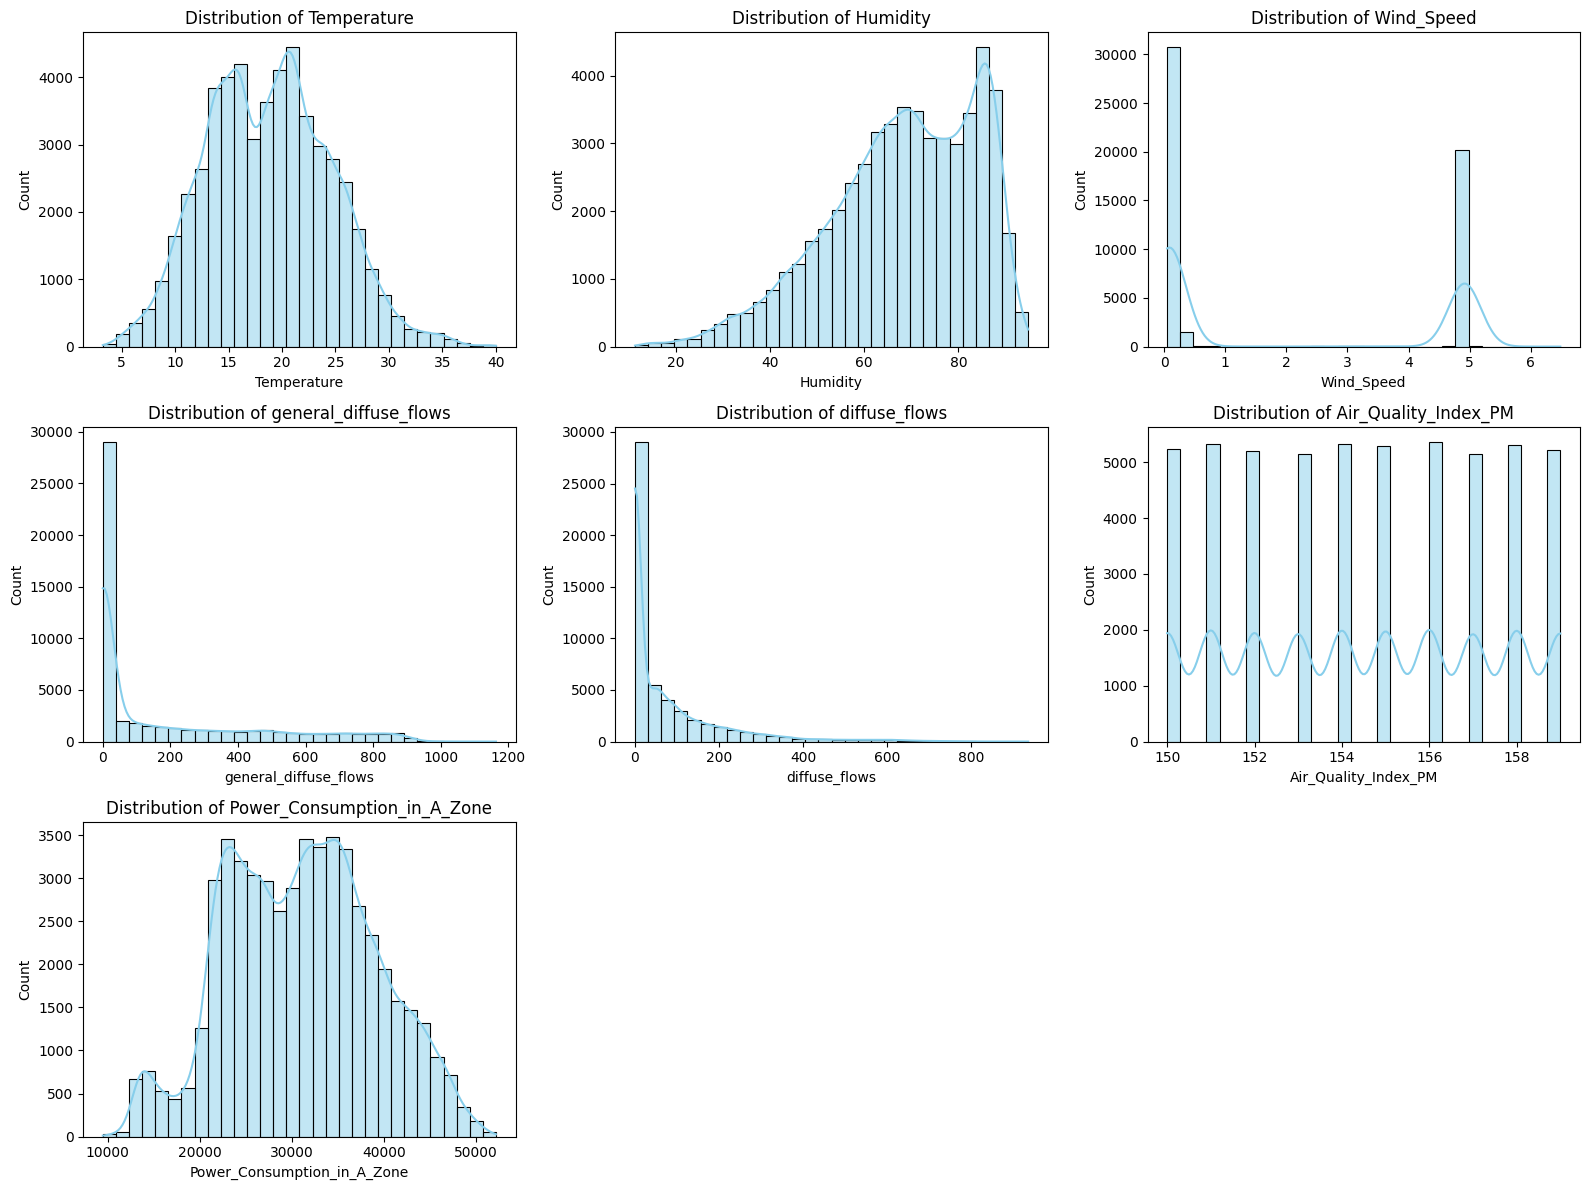

In [29]:
numerical_cols = ['Temperature', 'Humidity', 'Wind_Speed', 
                  'general_diffuse_flows', 'diffuse_flows', 
                  'Air_Quality_Index_PM', 'Power_Consumption_in_A_Zone']

# Create subplots
plt.figure(figsize=(16, 12)) 

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i) 
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

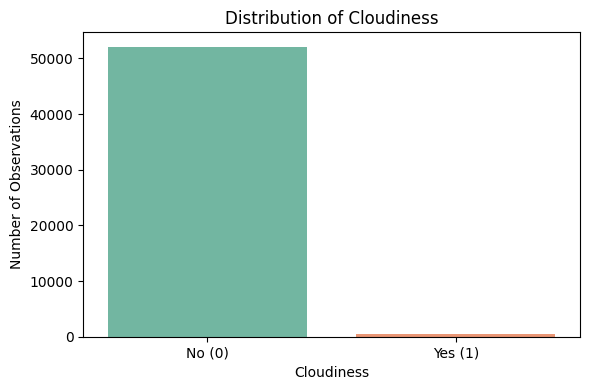

In [30]:
# Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Cloudiness', data=df, palette='Set2')

# title and axis labels
plt.title('Distribution of Cloudiness')
plt.xlabel('Cloudiness')
plt.ylabel('Number of Observations')

# Custom tick labels
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

# **Bivariate Analysis**

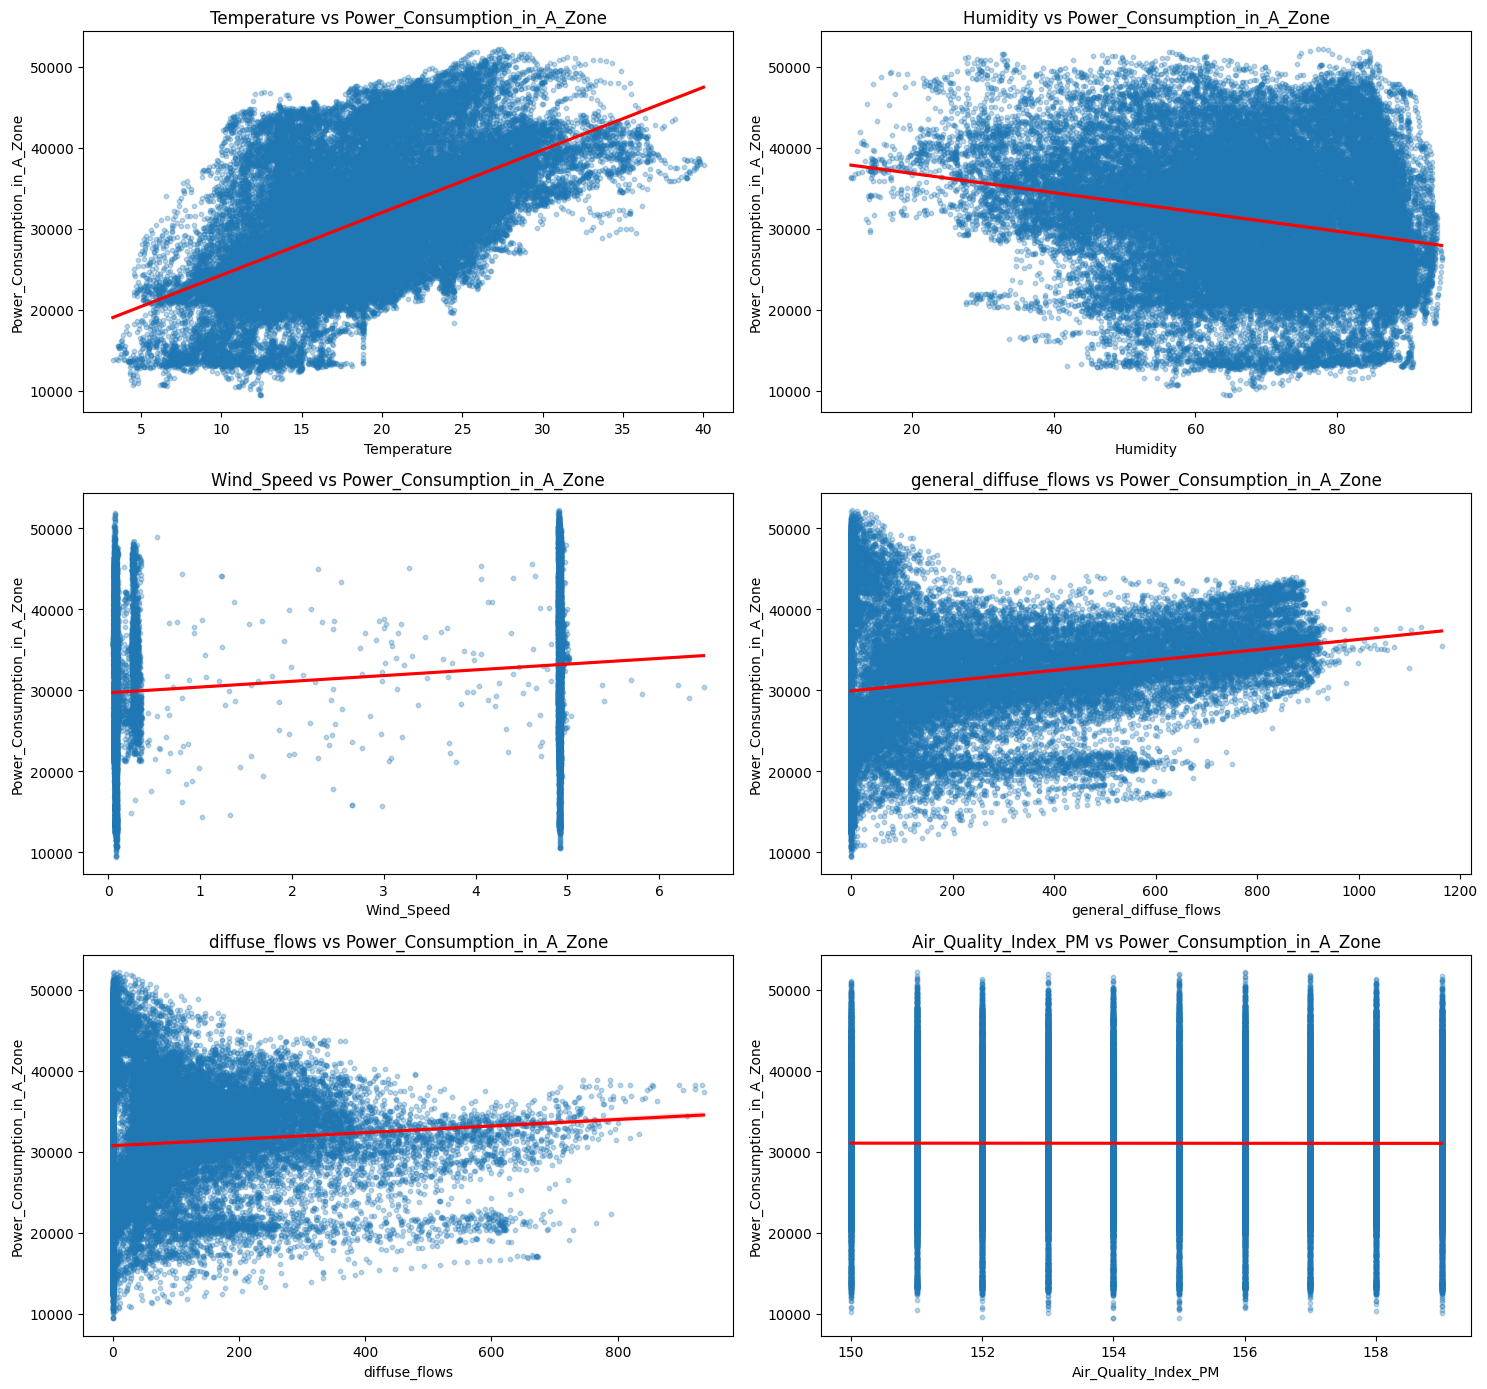

In [32]:
# Relationship of each feature with Power Consumption in A Zone
Features = ['Temperature', 'Humidity', 'Wind_Speed', 
                  'general_diffuse_flows', 'diffuse_flows', 
                  'Air_Quality_Index_PM']

# Relationship of each feature with Power Consumption
plt.figure(figsize=(15, 14))

for i, col in enumerate(Features, 1):
    plt.subplot((len(Features)+1)//2, 2, i)
    sns.regplot(data=df, x=col, y='Power_Consumption_in_A_Zone', 
                scatter_kws={'alpha':0.3, 's':10}, 
                line_kws={'color':'red'})
    plt.title(f"{col} vs Power_Consumption_in_A_Zone")
    plt.xlabel(col)
    plt.ylabel("Power_Consumption_in_A_Zone")

plt.tight_layout()
plt.show()


### Interpreting the Red Line in Regression Plots

The **red line** in each regression plot shows the **trend** between the feature and power consumption. Here's how to interpret it:

| **Red Line Trend**             | **Meaning**                                                  |
|--------------------------------|----------------------------------------------------------------|
| 📈 **Upward Sloping**          | As the feature increases, power consumption **increases** → *Positive correlation* |
| 📉 **Downward Sloping**        | As the feature increases, power consumption **decreases** → *Negative correlation* |
| ➖ **Flat or No Slope**        | No clear relationship between the feature and power consumption → *Weak or zero correlation* |

This helps in understanding how strongly and in what direction each feature influences power consumption.


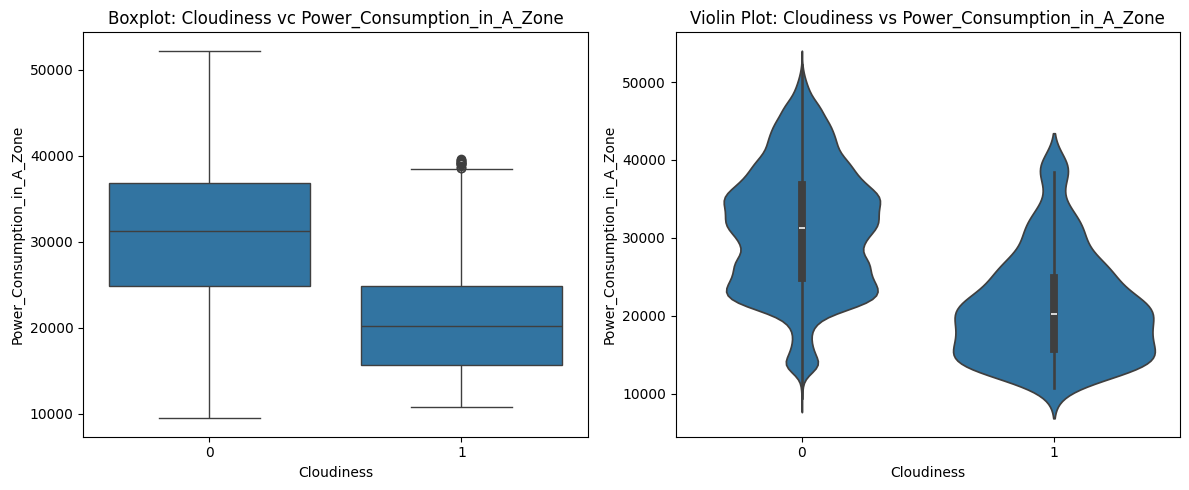

In [34]:
# Relationship of Cloudiness with Power Consumption in A Zone
plt.figure(figsize=(12,5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Cloudiness', y='Power_Consumption_in_A_Zone', data=df)
plt.title("Boxplot: Cloudiness vc Power_Consumption_in_A_Zone")

# Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='Cloudiness', y='Power_Consumption_in_A_Zone', data=df)
plt.title("Violin Plot: Cloudiness vs Power_Consumption_in_A_Zone")

plt.tight_layout()
plt.show()


**Insight: Impact of Cloudiness on Power Consumption in A Zone**  
Both the Boxplot and Violin Plot clearly indicate that:  
- Power consumption is higher on clear days (Cloudiness = 0) compared to cloudy days (Cloudiness = 1).
- The median power consumption on clear days is significantly higher than on cloudy days.
- The range and variability in power consumption are also larger on clear days, suggesting more extreme energy usage.
- Violin plot shows denser concentration of high consumption values on clear days, while cloudy days have a tighter and lower distribution.

# **Multivariate Analysis**

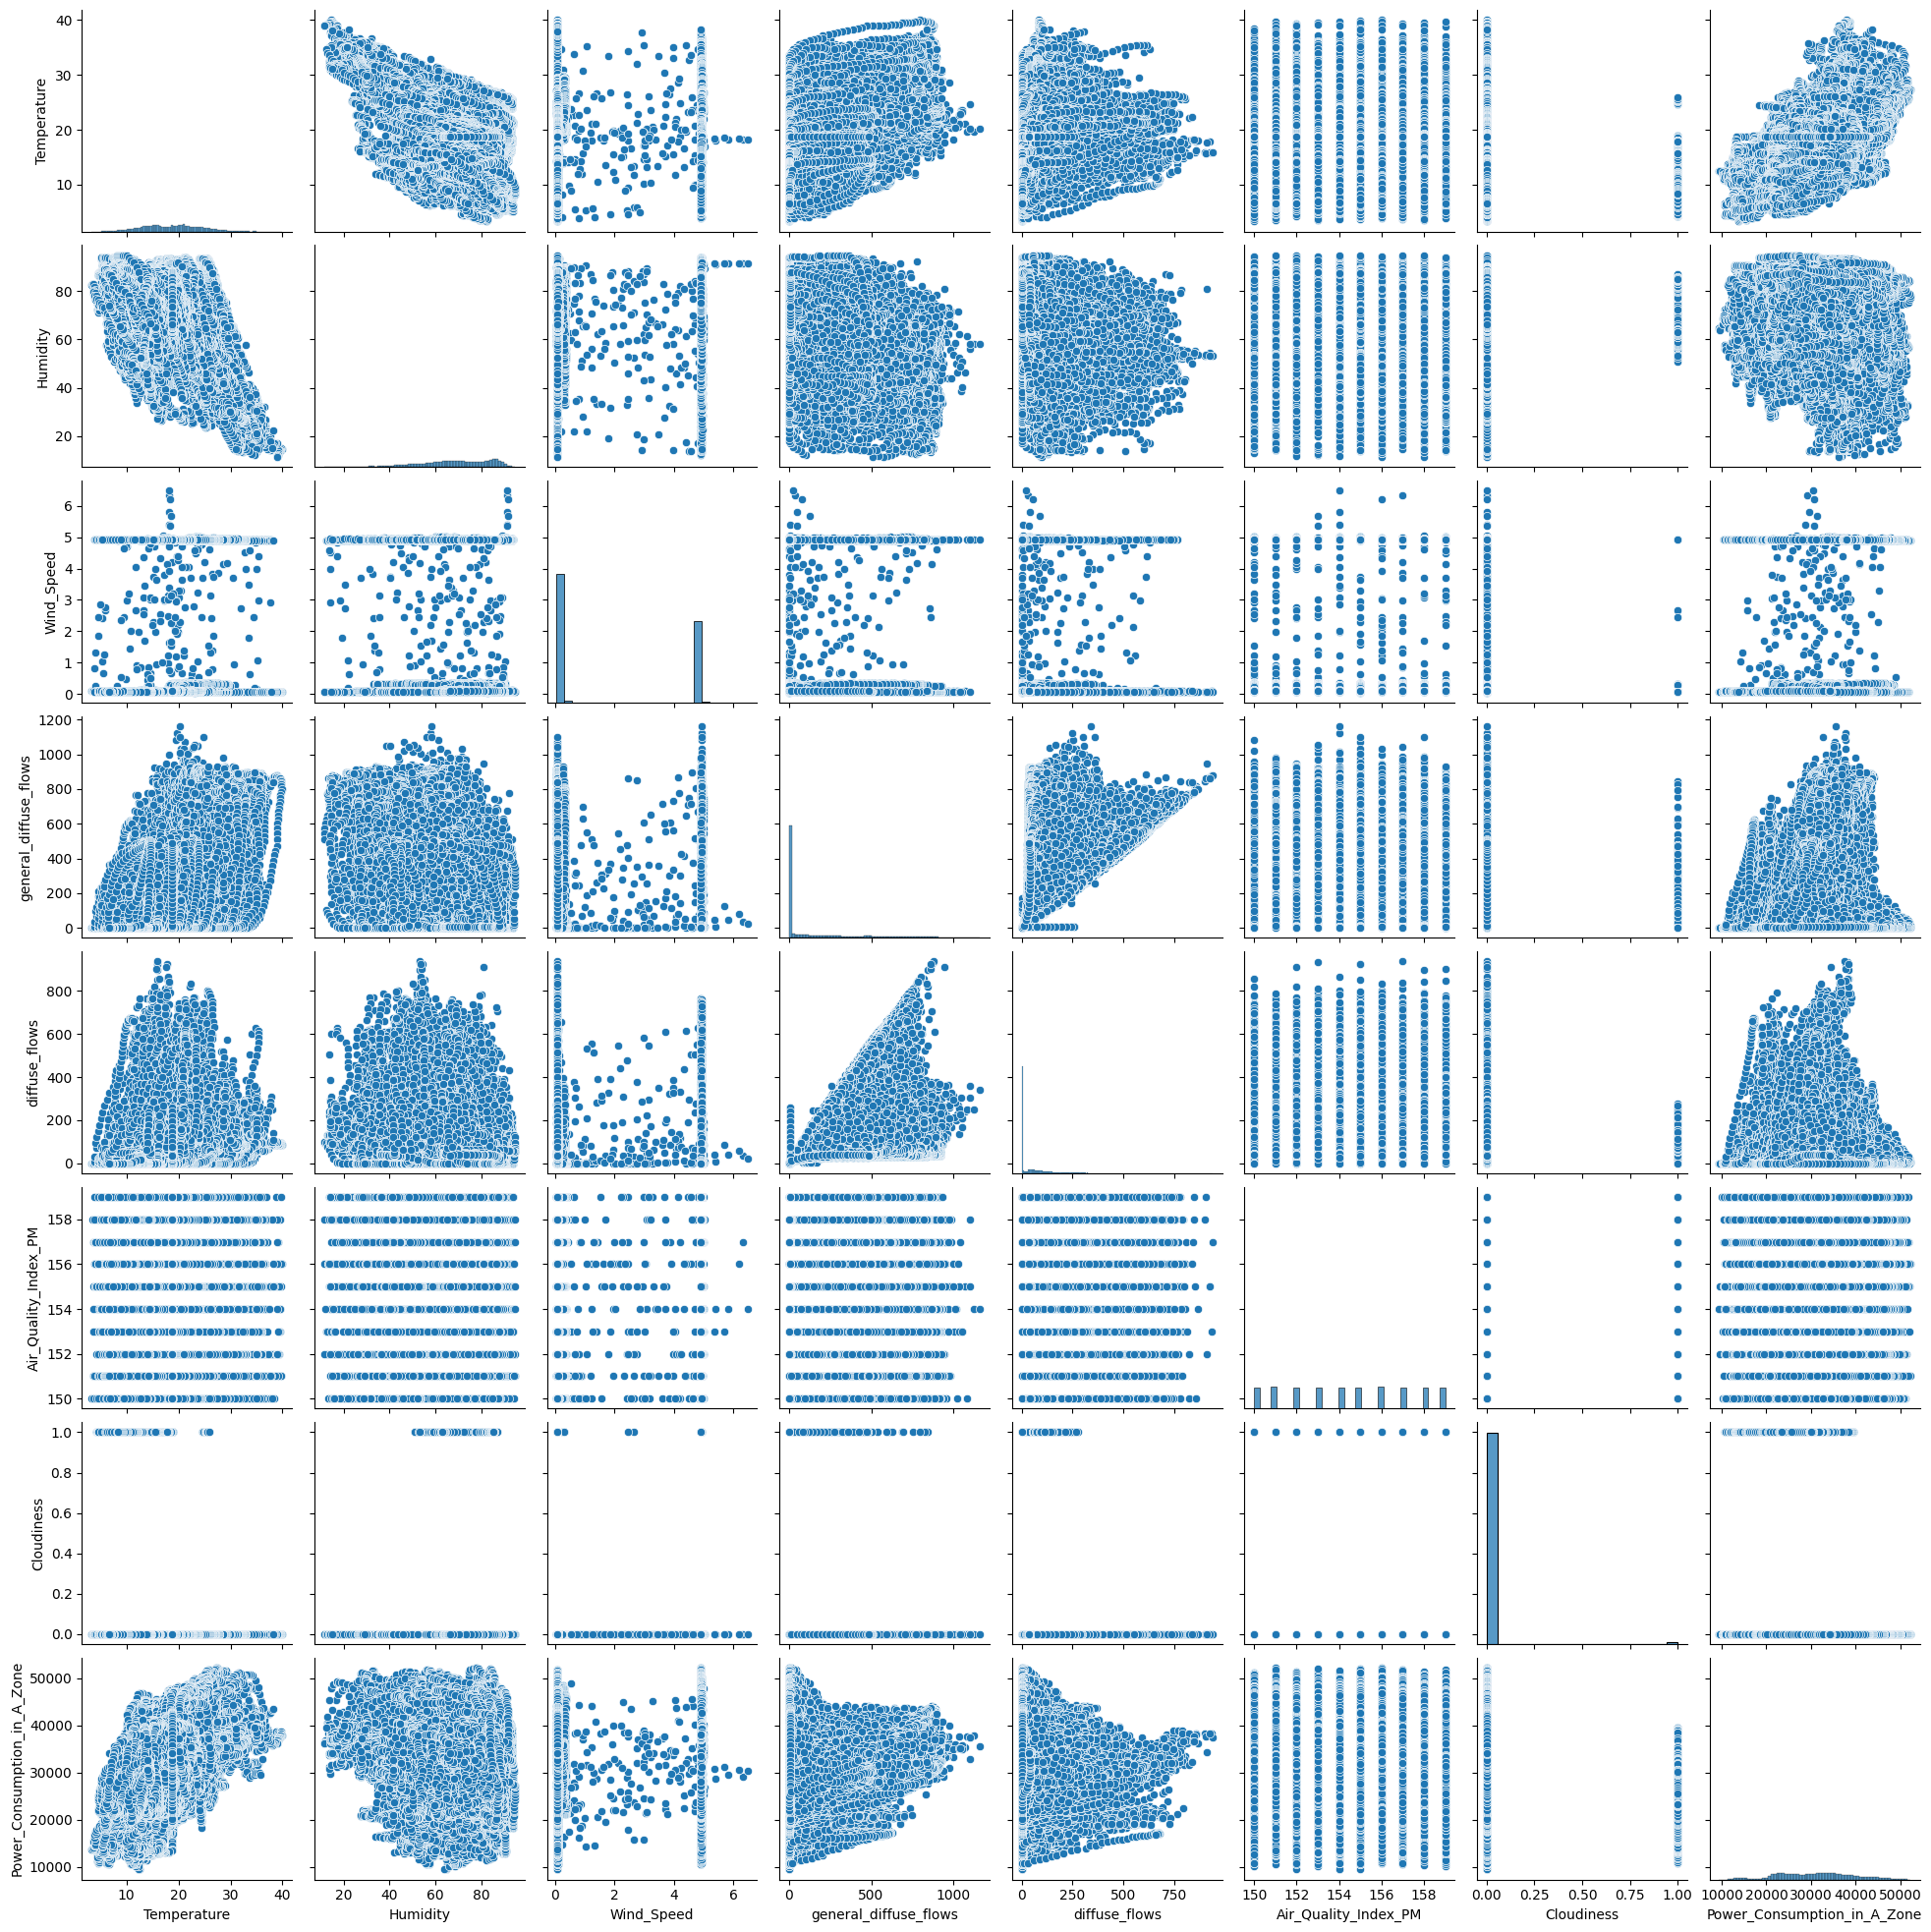

In [37]:
# pairplot-
sns.pairplot(df)
plt.show()

In [38]:
#sns.pairplot(data =df,hue ='Power_Consumption_in_A_Zone')
#plt.show()

# **Outlier Detection**

In [40]:
# Create a copy of the original dataframe to store capped values
df_cap = df.copy()

In [41]:
# Define numerical columns
outlier_cols = ['Temperature', 'Humidity', 'general_diffuse_flows', 'diffuse_flows']

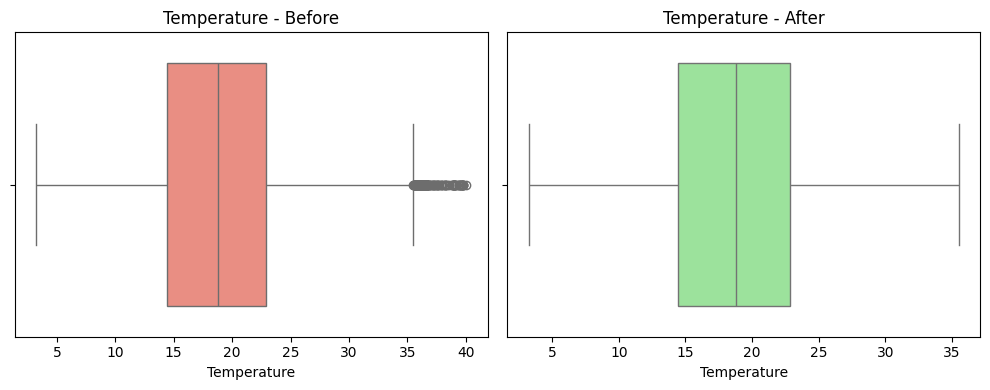

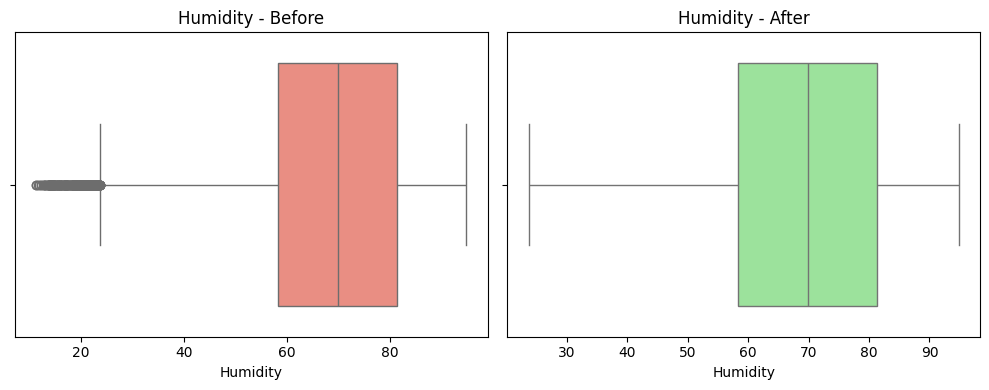

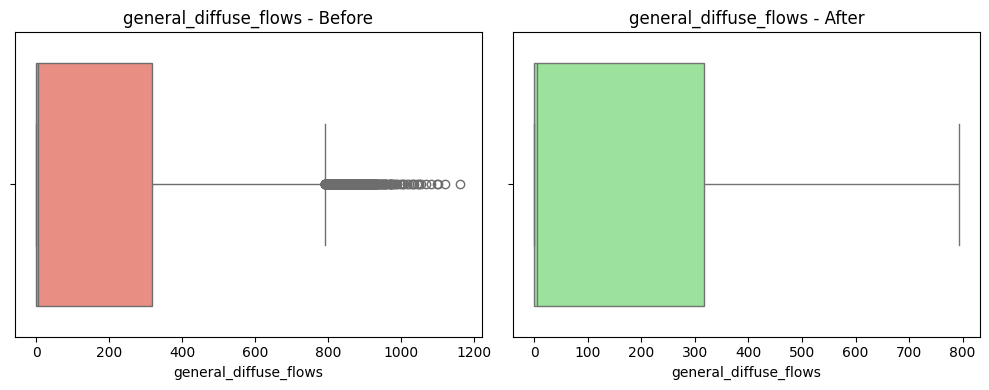

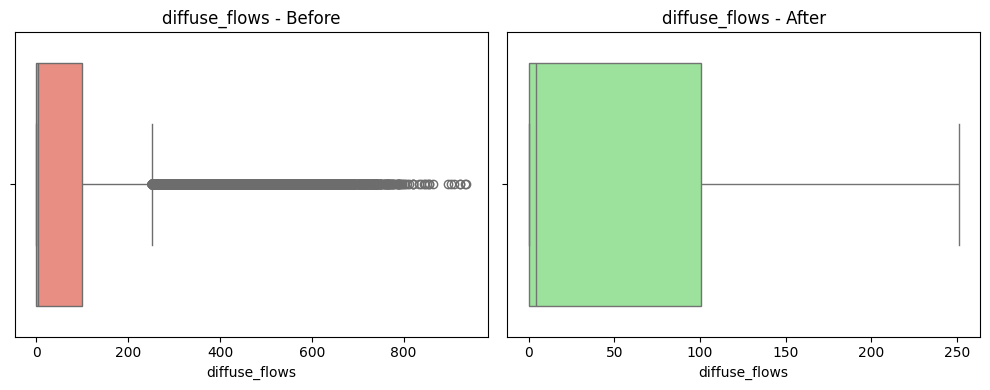

In [42]:
# Outlier Detection and Treatment using IQR Method
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers in a copy
    df_cap[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

     # Visualizing Boxplots - Before and After
    plt.figure(figsize=(10, 4))

    # Before Outlier Treatment
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'{col} - Before')

    # After Outlier Treatment
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_cap[col], color='lightgreen')
    plt.title(f'{col} - After')

    plt.tight_layout()
    plt.show()


# **Skewness Reduction**

In [44]:
df.skew()

Temperature                     0.194462
Humidity                       -0.627568
Wind_Speed                      0.468408
general_diffuse_flows           1.313883
diffuse_flows                   2.461325
Air_Quality_Index_PM           -0.001800
Cloudiness                     10.203384
Power_Consumption_in_A_Zone     0.031528
dtype: float64

In [45]:
# List of skewed features
skewed_features = ['general_diffuse_flows', 'diffuse_flows']

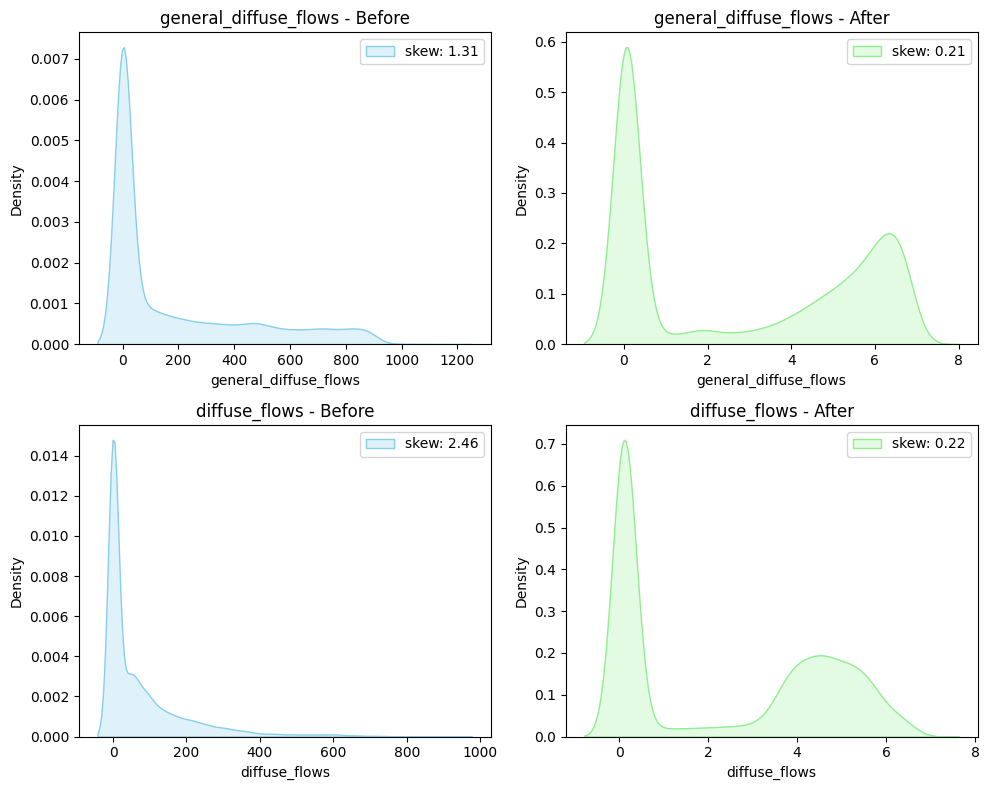

In [46]:
# Plot before and after skewness correction
plt.figure(figsize=(10, 8))

for i, col in enumerate(skewed_features):
    # Original skew
    skew_before = round(df[col].skew(), 2)

    # Apply log1p transformation for skewness reduction
    df[col + '_log'] = np.log1p(df[col])

    # Transformed skew
    skew_after = round(df[col + '_log'].skew(), 2)

    # Plot Before
    plt.subplot(2, 2, 2*i+1)
    sns.kdeplot(df[col], fill=True, label=f"skew: {skew_before}", color="skyblue")
    plt.title(f"{col} - Before")
    plt.xlabel(col)
    plt.legend()

    # Plot After
    plt.subplot(2, 2, 2*i+2)
    sns.kdeplot(df[col + '_log'], fill=True, label=f"skew: {skew_after}", color="lightgreen")
    plt.title(f"{col} - After")
    plt.xlabel(col)
    plt.legend()

plt.tight_layout()
plt.show()


In [47]:
# Replace original columns with transformed versions
df['general_diffuse_flows'] = df['general_diffuse_flows_log']
df['diffuse_flows'] = df['diffuse_flows_log']

In [48]:
# Drop temporary columns
df.drop(['general_diffuse_flows_log', 'diffuse_flows_log'], axis=1, inplace=True)

# **🧮 Correlation Heatmap**

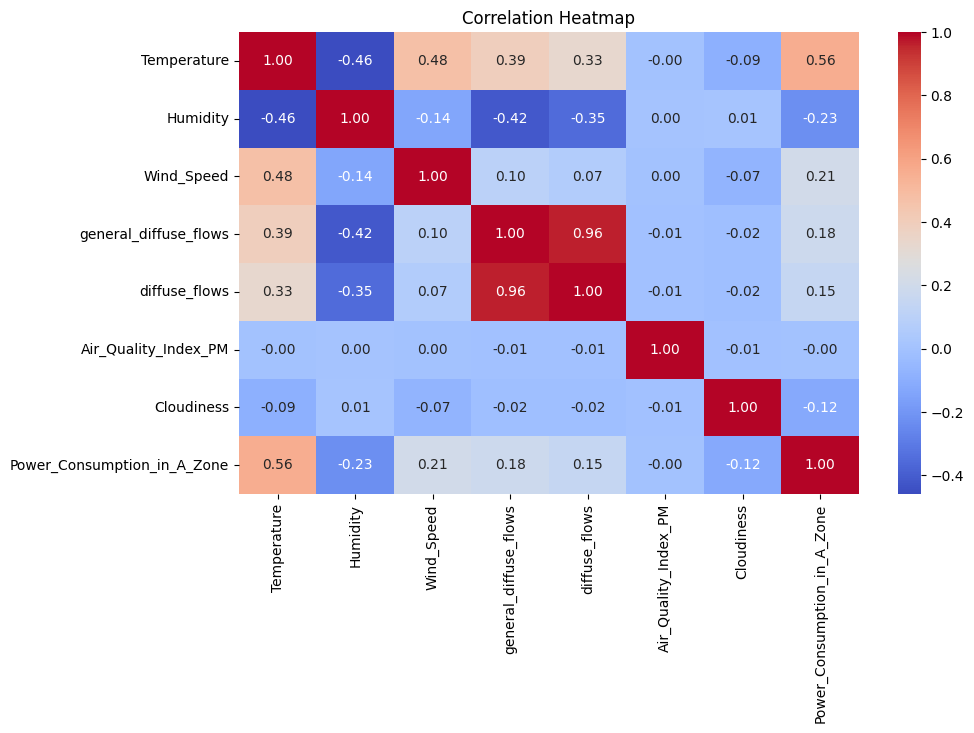

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Insights from Heatmap  

- `Temperature` has the strongest positive correlation (+0.56) with power consumption.  
- `diffuse_flows` and `general_diffuse_flows` show very high correlation (+0.96) → indicating redundancy.  
- `Air_Quality_Index_PM` and `Cloudiness` show almost no correlation with the target → low predictive value.
- Based on these insights, we dropped: `Air_Quality_Index_PM`, `diffuse_flows`, and `Cloudiness`]  
This helped improve model efficiency, reduce overfitting, and avoid multicollinearity.  


In [52]:
# Drop irrelevant and highly correlated features
df.drop(['Air_Quality_Index_PM', 'diffuse_flows', 'Cloudiness'], axis=1, inplace=True)

In [53]:
# Check the updated DataFrame structure
df.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows',
       'Power_Consumption_in_A_Zone'],
      dtype='object')

# **5️⃣ Train-Test Split**

In [55]:
# Separate features and target
X = df.drop('Power_Consumption_in_A_Zone', axis=1)
y = df['Power_Consumption_in_A_Zone']

In [56]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Shapes
print(X_train.shape, X_test.shape)

(42066, 4) (10517, 4)


# **6️⃣ Feature Scaling**

In [59]:
# Select features to scale 
features_to_scale = ['Temperature', 'Humidity', 'Wind_Speed', 'general_diffuse_flows']

In [60]:
# Initialize scaler
scaler = StandardScaler()

In [61]:
# Fit ONLY on training data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test_scaled[features_to_scale] = scaler.transform(X_test[features_to_scale])


# **7️⃣ Model Building**

# **Linear Regression**

In [64]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [65]:
y_pred_train_lr =lr.predict(X_train_scaled)
y_pred_test_lr = lr.predict(X_test_scaled)

In [66]:
# Evaluation
print("********** Linear Regression **********")

# R² Scores
print('Training_Accuracy (R²): ',r2_score(y_train,y_pred_train_lr))
print('Testing_Accuracy (R²): ',r2_score(y_test,y_pred_test_lr))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_lr))
print("MSE:", mean_squared_error(y_test, y_pred_test_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_lr)))


********** Linear Regression **********
Training_Accuracy (R²):  0.31816643974515957
Testing_Accuracy (R²):  0.32523956680483734
MAE: 5310.431560153517
MSE: 43589314.9753101
RMSE: 6602.220457945198


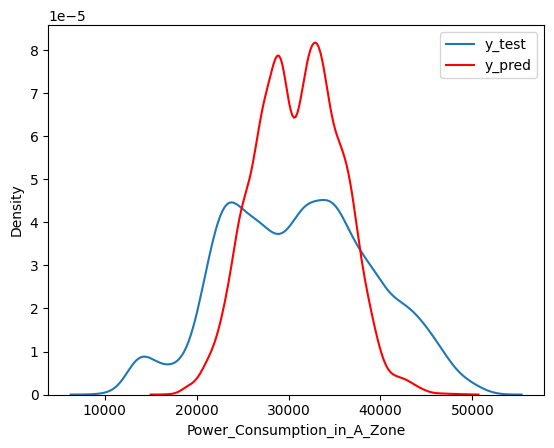

In [67]:
# Actual vs Predicted graph -
sns.distplot(y_test, label='y_test', hist=False)
sns.distplot(y_pred_test_lr, label='y_pred', hist=False, color='r')
plt.legend()
plt.show()

# **Decision Tree Regressor**

In [69]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [70]:
y_pred_train_dt = dt.predict(X_train_scaled)
y_pred_test_dt = dt.predict(X_test_scaled)

In [71]:
# Evaluation
print("********** Decision Tree Regressor **********")

# R² Scores
print('Training_Accuracy (R²): ',r2_score(y_train,y_pred_train_dt))
print('Testing_Accuracy (R²): ',r2_score(y_test,y_pred_test_dt))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_dt))
print("MSE:", mean_squared_error(y_test, y_pred_test_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_dt)))


********** Decision Tree Regressor **********
Training_Accuracy (R²):  0.998243184701564
Testing_Accuracy (R²):  0.2671706710077152
MAE: 4205.522988345603
MSE: 47340547.65678702
RMSE: 6880.446762877177


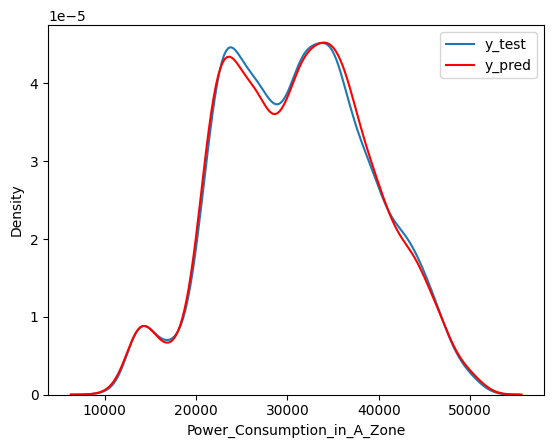

In [72]:
# Actual vs Predicted graph -
sns.distplot(y_test, label='y_test', hist=False)
sns.distplot(y_pred_test_dt, label='y_pred', hist=False, color='r')
plt.legend()
plt.show()

# **Random Forest Regressor**

In [74]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [75]:
y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_test_rf = rf.predict(X_test_scaled)

In [76]:
# Evaluation
print("********** Random Forest Regressor **********")

# R² Scores
print('Training_Accuracy (R²): ',r2_score(y_train,y_pred_train_rf))
print('Testing_Accuracy (R²): ',r2_score(y_test,y_pred_test_rf))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_rf))
print("MSE:", mean_squared_error(y_test, y_pred_test_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_rf)))


********** Random Forest Regressor **********
Training_Accuracy (R²):  0.9448215632976456
Testing_Accuracy (R²):  0.6192126556798059
MAE: 3447.8083004181262
MSE: 24598744.493045945
RMSE: 4959.712138123134


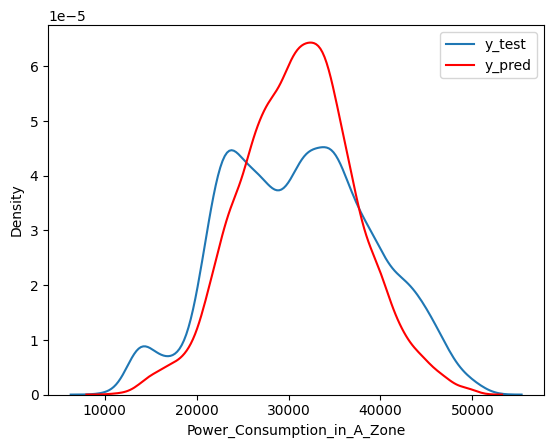

In [77]:
# Actual vs Predicted graph -
sns.distplot(y_test, label='y_test', hist=False)
sns.distplot(y_pred_test_rf, label='y_pred', hist=False, color='r')
plt.legend()
plt.show()

# **XGBoost Regressor**

In [79]:
xgb = XGBRegressor(random_state=42, verbosity=0)
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [80]:
y_pred_train_xgb = xgb.predict(X_train_scaled)
y_pred_test_xgb = xgb.predict(X_test_scaled)

In [81]:
# Evaluation
print("********** XGBoost Regressor **********")

# R² Scores
print('Training_Accuracy (R²): ',r2_score(y_train,y_pred_train_xgb))
print('Testing_Accuracy (R²): ',r2_score(y_test,y_pred_test_xgb))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_test_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_xgb)))


********** XGBoost Regressor **********
Training_Accuracy (R²):  0.6439605257702611
Testing_Accuracy (R²):  0.548596074698996
MAE: 4027.3442431252374
MSE: 29160553.75070543
RMSE: 5400.051272970048


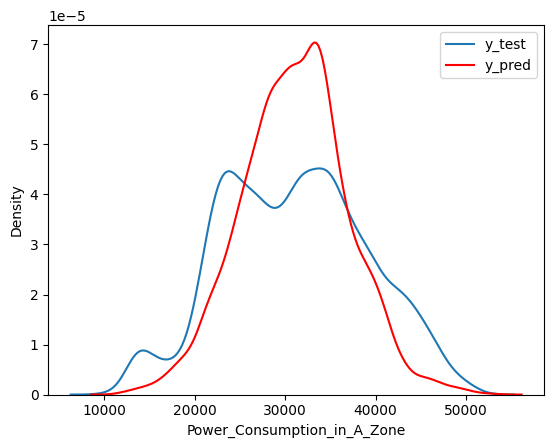

In [82]:
# Actual vs Predicted graph -
sns.distplot(y_test, label='y_test', hist=False)
sns.distplot(y_pred_test_xgb, label='y_pred', hist=False, color='r')
plt.legend()
plt.show()

# **Support Vector Regressor (SVR)**

In [84]:
svr = SVR()
svr.fit(X_train_scaled, y_train)

SVR()

In [85]:
y_pred_train_svr = svr.predict(X_train_scaled)
y_pred_test_svr = svr.predict(X_test_scaled)

In [86]:
# Evaluation
print("********** Support Vector Regressor **********")

# R² Scores
print('Training_Accuracy (R²): ',r2_score(y_train,y_pred_train_svr))
print('Testing_Accuracy (R²): ',r2_score(y_test,y_pred_test_svr))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_svr))
print("MSE:", mean_squared_error(y_test, y_pred_test_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_svr)))


********** Support Vector Regressor **********
Training_Accuracy (R²):  0.1412466454217215
Testing_Accuracy (R²):  0.1466666175525686
MAE: 5921.98083683249
MSE: 55125072.18349226
RMSE: 7424.626063546383


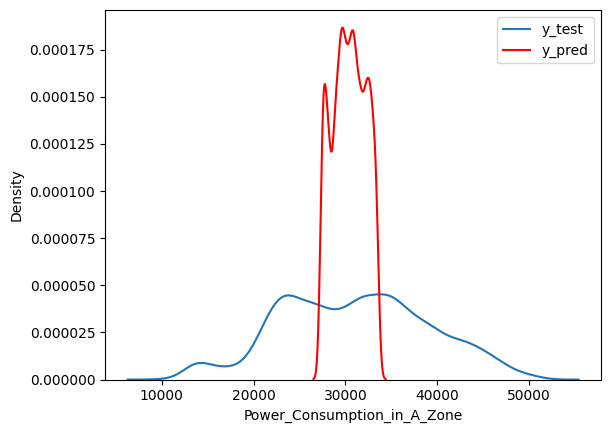

In [87]:
# Actual vs Predicted graph -
sns.distplot(y_test, label='y_test', hist=False)
sns.distplot(y_pred_test_svr, label='y_pred', hist=False, color='r')
plt.legend()
plt.show()

# **Model Comparison Table**

In [89]:
# Model comparison data
data = [
    ['Linear Regression', 0.3181,  0.3252,  5310.4315, 43589314.9753,  6602.2204],
    ['Decision Tree Regressor', 0.9982,  0.2671, 4205.5229, 47340547.6567,6880.4467],
    ['Random Forest Regressor',   0.9448, 0.6192, 3447.8083, 24598744.4930, 4959.7121],
    ['XGBoost Regressor',   0.6439,   0.5485, 4027.3442, 29160553.7507, 5400.0512],
    ['Support Vector Regressor', 0.1412,  0.1466,  5921.9808, 55125072.1834, 7424.6260]
]

# Column names
headers = ['Model', 'Training_Accuracy (R²)', 'Testing_Accuracy (R²)', 'MAE', 'MSE', 'RMSE']

# Create DataFrame
df_models = pd.DataFrame(data, columns=headers)

# Set 'Model' as index
df_models.set_index('Model', inplace=True)

df_models['MSE'] = df_models['MSE'].apply(lambda x: '{:.2f}'.format(x))

# Round to 4 decimal places
df_models = df_models.round(4)

# Display the DataFrame
display(df_models)

Training_Accuracy (R²)  Testing_Accuracy (R²)  \
Model                                                                     
Linear Regression                         0.3181                 0.3252   
Decision Tree Regressor                   0.9982                 0.2671   
Random Forest Regressor                   0.9448                 0.6192   
XGBoost Regressor                         0.6439                 0.5485   
Support Vector Regressor                  0.1412                 0.1466   

                                MAE          MSE       RMSE  
Model                                                        
Linear Regression         5310.4315  43589314.98  6602.2204  
Decision Tree Regressor   4205.5229  47340547.66  6880.4467  
Random Forest Regressor   3447.8083  24598744.49  4959.7121  
XGBoost Regressor         4027.3442  29160553.75  5400.0512  
Support Vector Regressor  5921.9808  55125072.18  7424.6260

# **📊 Compare Models by Training vs Testing Accuracy (R² Score)**

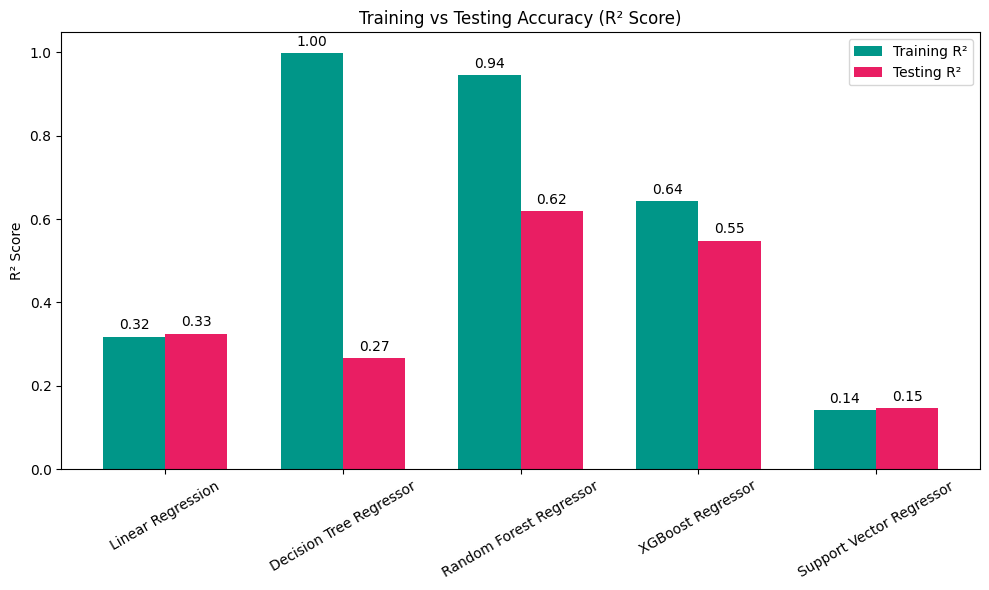

In [91]:
models = ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost Regressor', 'Support Vector Regressor']
train_r2 = [0.3181, 0.9982, 0.9448, 0.6439, 0.1412]
test_r2 = [0.3252, 0.2671, 0.6192, 0.5485, 0.1466]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10,6))
bar1 = plt.bar(x - width/2, train_r2, width, label='Training R²', color='#009688')
bar2 = plt.bar(x + width/2, test_r2, width, label='Testing R²', color='#E91E63')

plt.ylabel('R² Score')
plt.title('Training vs Testing Accuracy (R² Score)')
plt.xticks(x, models, rotation=30)
plt.legend()

# Add labels
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


**Insights from R² Score Comparison**  

- **Random Forest Regressor** and **XGBoost Regressor** have shown the **best generalization performance** (i.e., Testing R² ≈ 0.62 and 0.55 respectively), indicating they are more capable of learning meaningful patterns from the data.

- **Decision Tree Regressor** has a **very high Training R² (1.00)** but a low Testing R² (0.27), suggesting **severe overfitting**. It performs well on training data but poorly on unseen data.

- **Linear Regression** and **Support Vector Regressor (SVR)** have **low accuracy on both training and testing sets**, which implies **underfitting**. These models are too simple to capture the underlying complexity in the data.

- Based on this comparison, **Random Forest** and **XGBoost** are **strong candidates for final model selection**. Therefore, further **hyperparameter tuning will be applied only on these two models** to improve their performance.


# **Hyperparameter Tuning: Random Forest Regressor**

In [94]:
# Define hyperparameters to tune
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [95]:
# GridSearchCV
grid_rf = GridSearchCV(estimator= rf, param_grid = param_grid_rf, 
                       cv=3, scoring='r2', n_jobs=-1, verbose=2)

# Fit
grid_rf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=2)

In [96]:
# Best Model
best_rf = grid_rf.best_estimator_

In [97]:
# Predict
y_pred_train_rf = best_rf.predict(X_train_scaled)
y_pred_test_rf = best_rf.predict(X_test_scaled)

In [98]:
# Evaluation
print("Best Parameters (Random Forest):", grid_rf.best_params_)

# R² Scores
print('Training_Accuracy (R²): ',r2_score(y_train, y_pred_train_rf))
print('Testing_Accuracy (R²): ',r2_score(y_test, y_pred_test_rf))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_rf))
print("MSE:", mean_squared_error(y_test, y_pred_test_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_rf)))


Best Parameters (Random Forest): {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training_Accuracy (R²):  0.9099109545363087
Testing_Accuracy (R²):  0.6205469392184475
MAE: 3475.5517255976765
MSE: 24512550.189748082
RMSE: 4951.015066604836


# **Hyperparameter Tuning: XGBoost Regressor**

In [100]:
# Define hyperparameters to tune
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}


In [101]:
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

grid_xgb = GridSearchCV(
    estimator = xgb,
    param_grid = param_grid_xgb,
    cv=3,
    n_jobs=-1,
    scoring='r2',
    verbose=2
)

In [102]:
# Fit
grid_xgb.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 10], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1]},
             scoring='r2', verbose=2)

In [103]:
# Best Model
best_xgb = grid_xgb.best_estimator_

In [104]:
# Predict
y_pred_train_xgb = best_xgb.predict(X_train_scaled)
y_pred_test_xgb = best_xgb.predict(X_test_scaled)

In [105]:
# Evaluation
print("Best Parameters (XGBoost):", grid_xgb.best_params_)

# R² Scores
print('Training_Accuracy (R²): ',r2_score(y_train, y_pred_train_xgb))
print('Testing_Accuracy (R²): ',r2_score(y_test, y_pred_test_xgb))

# Errors on Test Set
print("MAE:", mean_absolute_error(y_test, y_pred_test_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_test_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test_xgb)))


Best Parameters (XGBoost): {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
Training_Accuracy (R²):  0.8062996451053775
Testing_Accuracy (R²):  0.5943860789435903
MAE: 3692.2429870290957
MSE: 26202533.66009778
RMSE: 5118.841046574682


### Tuned Random Forest vs. XGBoost Regressor

| Metric                    | Random Forest (Tuned)     | XGBoost (Tuned)            |
|---------------------------|---------------------------|-----------------------------|
| Testing R²                | 0.6205                    | 0.5944                      |
| MAE                       | 3475.55                   | 3692.24                     |
| MSE                       | 24512550.19               | 26202533.66                 |
| RMSE                      | 4951.02                   | 5118.84                     |


# **📊 Final Model Comparison**

In [108]:
# Model comparison data
data = [
    ['Linear Regression', 0.3181,  0.3252,  5310.4315, 43589314.9753,  6602.2204],
    ['Decision Tree Regressor', 0.9982,  0.2671, 4205.5229, 47340547.6567,6880.4467],
    ['Random Forest Regressor', 0.9099, 0.6205, 3475.5517, 24512550.1897, 4951.0150],
    ['XGBoost Regressor', 0.8062, 0.5943, 3692.2429, 26202533.66, 5118.8410],
    ['Support Vector Regressor', 0.1412,  0.1466,  5921.9808, 55125072.1834, 7424.6260]
]

# Column names
headers = ['Model', 'Training_Accuracy (R²)', 'Testing_Accuracy (R²)', 'MAE', 'MSE', 'RMSE']

# Create DataFrame
df_models = pd.DataFrame(data, columns=headers)

# Set 'Model' as index
df_models.set_index('Model', inplace=True)

df_models['MSE'] = df_models['MSE'].apply(lambda x: '{:.2f}'.format(x))

# Round to 4 decimal places
df_models = df_models.round(4)

# Display the DataFrame
display(df_models)

Training_Accuracy (R²)  Testing_Accuracy (R²)  \
Model                                                                     
Linear Regression                         0.3181                 0.3252   
Decision Tree Regressor                   0.9982                 0.2671   
Random Forest Regressor                   0.9099                 0.6205   
XGBoost Regressor                         0.8062                 0.5943   
Support Vector Regressor                  0.1412                 0.1466   

                                MAE          MSE       RMSE  
Model                                                        
Linear Regression         5310.4315  43589314.98  6602.2204  
Decision Tree Regressor   4205.5229  47340547.66  6880.4467  
Random Forest Regressor   3475.5517  24512550.19  4951.0150  
XGBoost Regressor         3692.2429  26202533.66  5118.8410  
Support Vector Regressor  5921.9808  55125072.18  7424.6260

 # **📊 Model Comparison Plots (R², MAE, MSE, RMSE)**

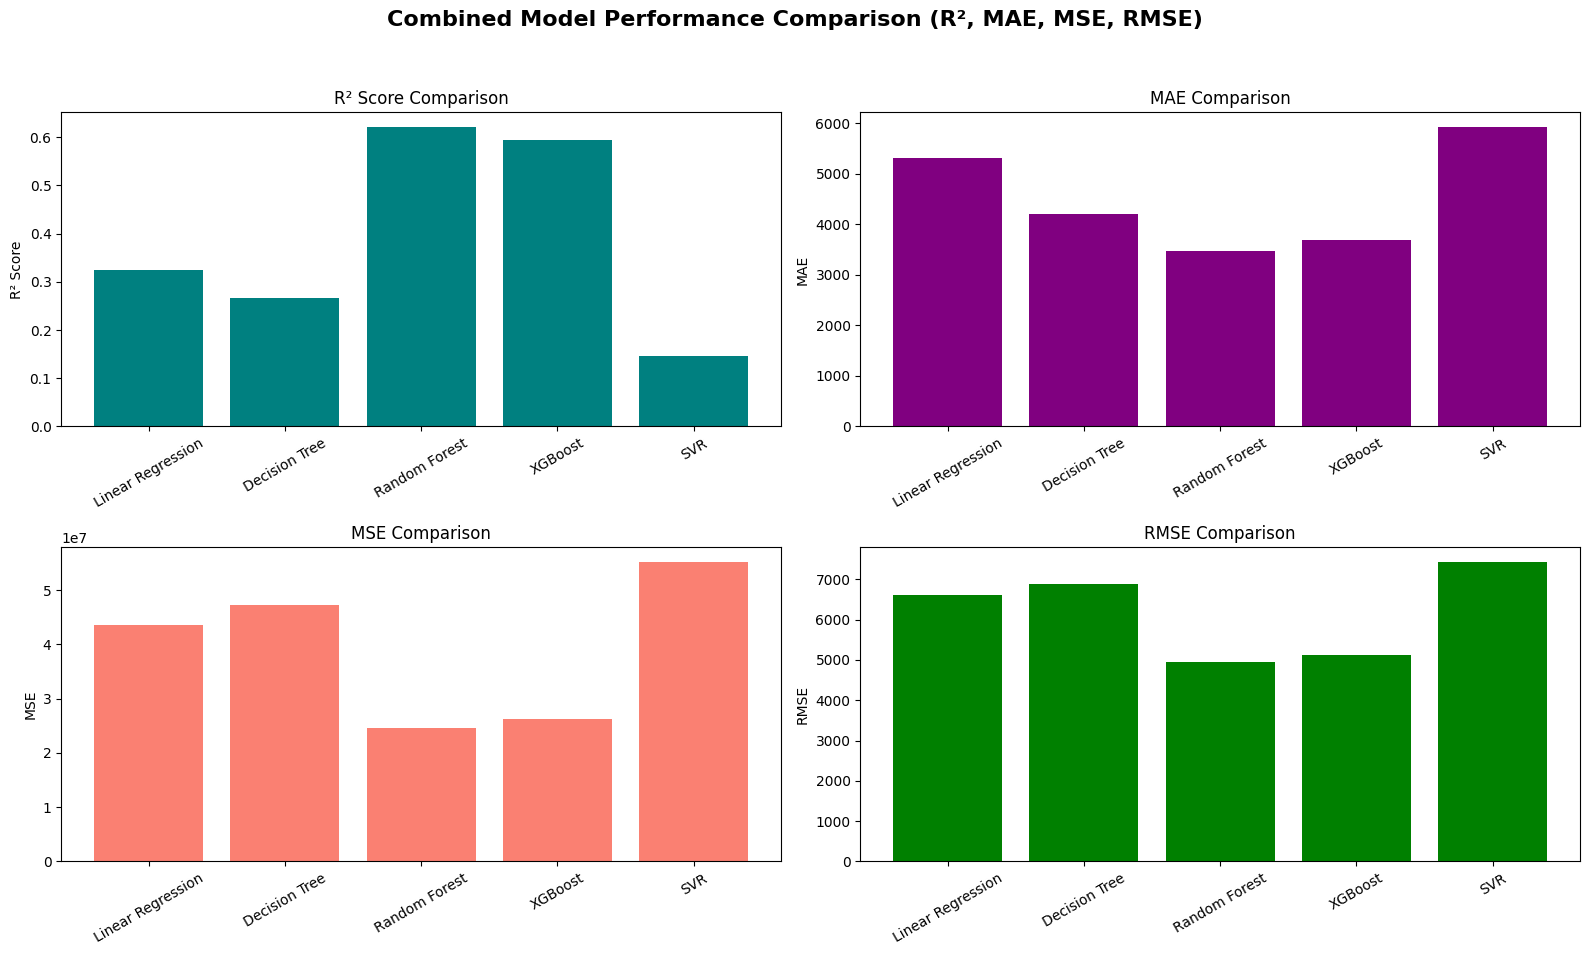

In [110]:
# Models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVR']

# Metric Values 
r2 = [0.3252, 0.2671, 0.6205, 0.5944, 0.1466]
mae = [5310.43, 4205.52, 3475.55, 3692.24, 5921.98]
mse = [43589314.98, 47340547.66, 24512550.19, 26202533.66, 55125072.18]
rmse = [6602.22, 6880.45, 4951.02, 5118.84, 7424.63]


# Set up 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# R² Plot
axes[0, 0].bar(models, r2, color='Teal')
axes[0, 0].set_title('R² Score Comparison')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].tick_params(axis='x', rotation=30)

# MAE Plot
axes[0, 1].bar(models, mae, color='Purple')
axes[0, 1].set_title('MAE Comparison')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].tick_params(axis='x', rotation=30)

# MSE Plot
axes[1, 0].bar(models, mse, color='salmon')
axes[1, 0].set_title('MSE Comparison')
axes[1, 0].set_ylabel('MSE')
axes[1, 0].tick_params(axis='x', rotation=30)

# RMSE Plot
axes[1, 1].bar(models, rmse, color='green')
axes[1, 1].set_title('RMSE Comparison')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].tick_params(axis='x', rotation=30)

# title and layout
plt.suptitle('Combined Model Performance Comparison (R², MAE, MSE, RMSE)', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

🏆 **Best Model: Random Forest** (better performance on all evaluation metrics)  
**Reason for Selection:**  
- **Highest Testing Accuracy (R²):** `0.6205`  
- **Lowest MAE:** `3475.55`  
- **Lowest MSE:** `24512550.18`  
- **Lowest RMSE:** `4951.01`

# **Feature Importances: Random Forest Regressor**

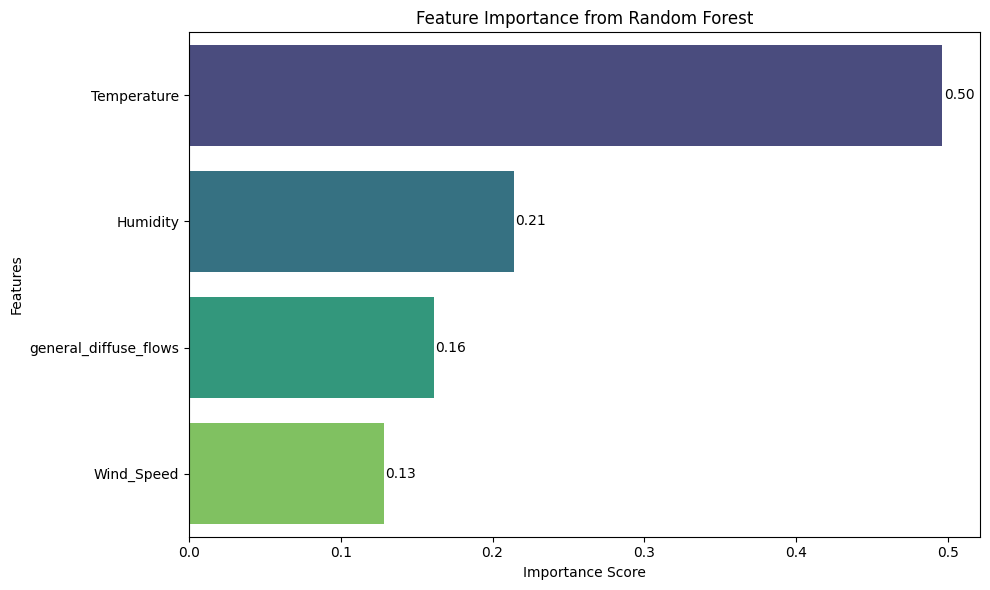

In [113]:
importances_rf = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_imp_rf = pd.DataFrame({'Feature': feature_names, 'Importance': importances_rf})
feat_imp_rf = feat_imp_rf.sort_values(by='Importance', ascending=False)

# Plot with value labels
plt.figure(figsize=(10, 6))
sns.barplot(data = feat_imp_rf, x='Importance', y='Feature', palette='viridis')

# Add labels to each bar
for index, value in enumerate(feat_imp_rf['Importance']):
    plt.text(value + 0.001, index, f"{value:.2f}", va='center')

plt.title('Feature Importance from Random Forest')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


# **🔚 Conclusion**

This project aimed to predict **Zone 1 power consumption in Wellington, New Zealand** using environmental and meteorological factors, in order to support efficient and sustainable energy management.

### 📌 Summary:

1. **Data Cleaning & Preparation**
   - Processed a dataset of **52,583 records**
   - Converted object columns like `Temperature` and `Humidity` to numeric
   - Handled missing values using **median imputation**
   - Dropped irrelevant column `S_no`  

2. **Exploratory Data Analysis & Feature Selection**
   - Detected and **capped outliers** in numerical columns to reduce the influence of extreme values
   - Applied **skewness reduction** to normalize heavily skewed distributions
   - Used a correlation heatmap to detect multicollinearity and weak features
   - Dropped features: `Air_Quality_Index_PM`, `Cloudiness`, and `diffuse_flows`
   - Found `Temperature` to be strongly correlated with power consumption (+0.56)  

4. **Model Building & Evaluation**
   - Trained five regression models:  
     `Linear Regression`, `Decision Tree`, `Random Forest`, `XGBoost`, `SVR`
   - Evaluated using: **R² Score, MAE, MSE, RMSE**
   - Since the goal was to reduce prediction error, the model was selected **based on lowest MAE and RMSE**
   - **Best Model: Random Forest Regressor**
     - R² Score: `0.6205`
     - MAE: `3475.55`
     - MSE: `24512550.18`
     - RMSE: `4951.01`  

5. **Feature Importance (from Random Forest)**
   - `Temperature`: **0.50**
   - `Humidity`: **0.21**
   - `general_diffuse_flows`: **0.16**
   - `Wind_Speed`: **0.13**  

### 🎯 Final Outcome:
The Random Forest model provided the most accurate and consistent predictions. It effectively captures the influence of environmental variables on energy usage and can be used to:  

- Forecast power demand in Zone 1
- Minimize energy waste
- Support real-time and sustainable energy planning
